In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
folder = '/home/sourav/100_shots/channel_22'
#Analysis on Loop Voltage
all_files = os.listdir(folder)
#let us take a look at the data
chosen_file1,chosen_file2 = all_files[0],all_files[1]
chosen_path1,chosen_path2 = os.path.join(folder,chosen_file1),os.path.join(folder,chosen_file2)
data1 = pd.read_csv(chosen_path1)
data2 = pd.read_csv(chosen_path2)

In [3]:
len(data1)==len(data2)

True

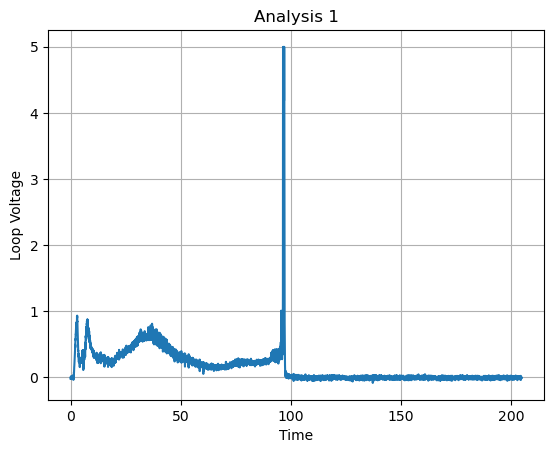

In [4]:
plt.figure()
plt.plot(data1['time'],data1['H_alpha'])
#plt.plot(data1['time'],data1['Loop Voltage'])
#plt.plot(data1['time'],data1['Plasma current'])
plt.xlabel('Time')
plt.ylabel('Loop Voltage')
plt.title('Analysis 1')
plt.grid()

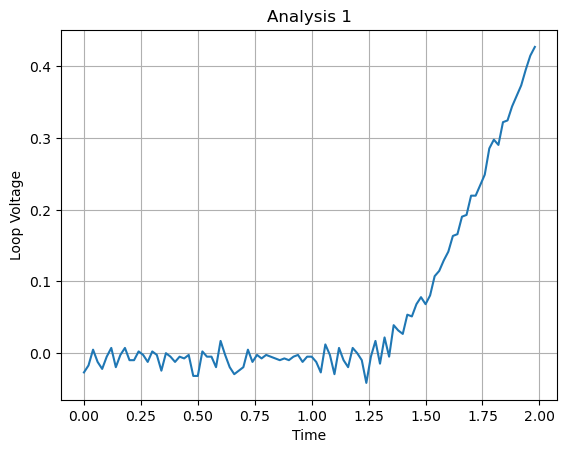

In [5]:
plt.figure()
plt.plot(data1['time'][0:100],data1['H_alpha'][0:100])
#plt.plot(data2['time'][0:100],data2['Loop Voltage'][0:100])
plt.xlabel('Time')
plt.ylabel('Loop Voltage')
plt.title('Analysis 1')
plt.grid()

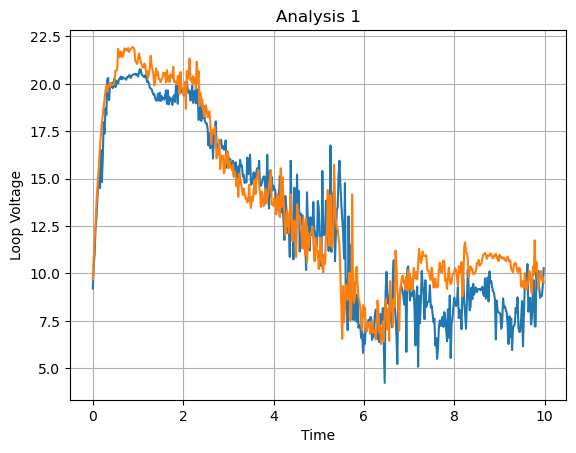

In [6]:
plt.figure()
plt.plot(data1['time'][0:500],data1['Loop Voltage'][0:500])
plt.plot(data2['time'][0:500],data2['Loop Voltage'][0:500])
plt.xlabel('Time')
plt.ylabel('Loop Voltage')
plt.title('Analysis 1')
plt.grid()

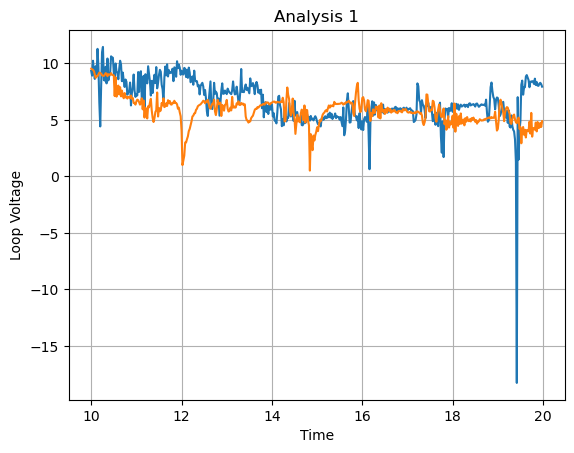

In [7]:
plt.figure()
plt.plot(data1['time'][500:1000],data1['Loop Voltage'][500:1000])
plt.plot(data2['time'][500:1000],data2['Loop Voltage'][500:1000])
plt.xlabel('Time')
plt.ylabel('Loop Voltage')
plt.title('Analysis 1')
plt.grid()

In [8]:
print(chosen_path1)
print(chosen_path2)

/home/sourav/100_shots/channel_2/shot_number_25098channel_no_2.csv
/home/sourav/100_shots/channel_2/shot_number_25075channel_no_2.csv


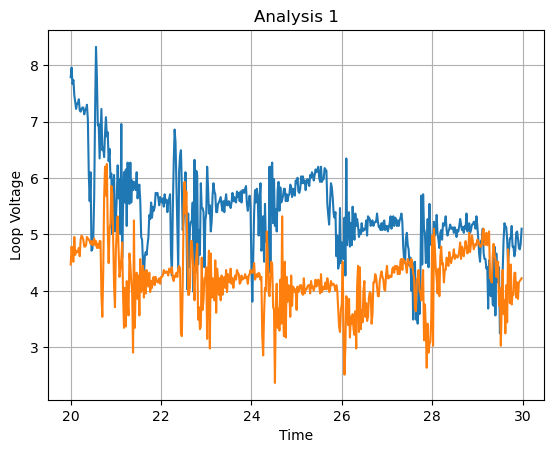

In [9]:
plt.figure()
plt.plot(data1['time'][1000:1500],data1['Loop Voltage'][1000:1500])
plt.plot(data2['time'][1000:1500],data2['Loop Voltage'][1000:1500])
plt.xlabel('Time')
plt.ylabel('Loop Voltage')
plt.title('Analysis 1')
plt.grid()

In [6]:
#Correlation between features of different shots
channels = [2,6,12,22,23,203,301,302]
shot_no = 25010
le = len(channels)
data_dict = {channels[i]:[] for i in range(le)}
time_dict = {channels[i]:[] for i in range(le)}
print(data_dict)

{2: [], 6: [], 12: [], 22: [], 23: [], 203: [], 301: [], 302: []}


In [7]:
for ch in channels:
    file_name = '/home/sourav/100_shots/channel_'+str(ch)+'/shot_number_'+str(shot_no)+'channel_no_'+str(ch)+'.csv';
    data = pd.read_csv(file_name)
    keys = data.keys()
    #print(keys);
    time_dict[ch] = data['time']
    data_dict[ch] = data[keys[1]]

In [8]:
#The time denomination
jump_value = np.zeros(le)
for idx,i in enumerate(channels):
    time_diff = time_dict[i][1]-time_dict[i][0]
    print('Channel:',i, ' Time diff.:',time_diff)
    jump_value[idx]=time_diff

Channel: 2  Time diff.: 0.02
Channel: 6  Time diff.: 0.2
Channel: 12  Time diff.: 0.2
Channel: 22  Time diff.: 0.02
Channel: 23  Time diff.: 0.02
Channel: 203  Time diff.: 0.2
Channel: 301  Time diff.: 0.001
Channel: 302  Time diff.: 0.02


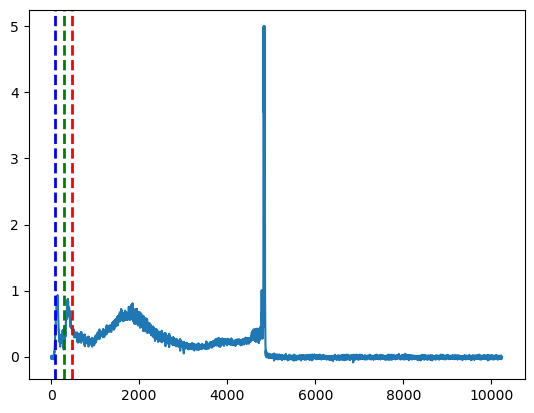

In [11]:
break_up_time, rev_time,when_to_stop = 0,0,0
pl_curr = data_dict[6]
h_x = data_dict[22]
min_val = 100000000
#slopes=[]
for i in range(len(pl_curr)-1):
    slope = 5*(pl_curr[i+1]-pl_curr[i])#(ip[t+1]-ip[t])/0.2
    #slopes.append(slope)
    if(slope<min_val):
        when_to_stop = i;
        min_val = slope
flagb = 0
min_val = 100000000
for i in range(when_to_stop):
    if(flagb==0 and h_x[i]>0.2):
        flagb = 1
        break_up_time = i
    slope = 50*(h_x[i+1]-h_x[i])
    if(slope<min_val):
        min_val = slope
        rev_time = i;
plt.figure()
plt.plot(h_x)
plt.axvline(x=break_up_time,color='b', linestyle='--', linewidth=2)
plt.axvline(x=rev_time,color='g', linestyle='--', linewidth=2)
plt.axvline(x=when_to_stop,color='r', linestyle='--', linewidth=2)

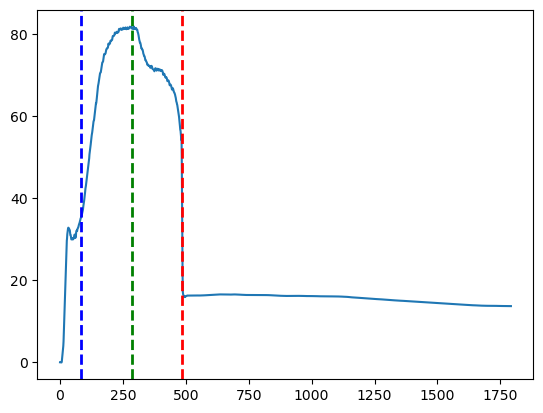

In [12]:
plt.figure()
plt.plot(pl_curr)
plt.axvline(x=break_up_time,color='b', linestyle='--', linewidth=2)
plt.axvline(x=rev_time,color='g', linestyle='--', linewidth=2)
plt.axvline(x=when_to_stop,color='r', linestyle='--', linewidth=2)

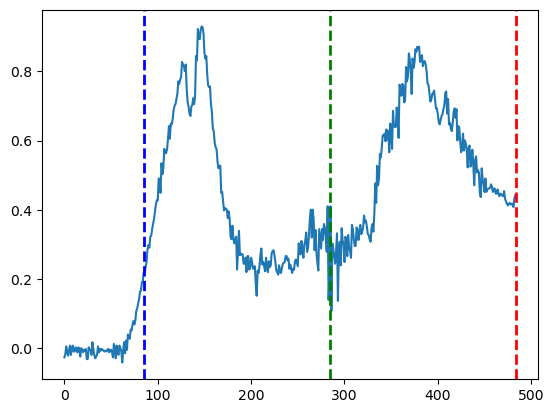

In [13]:
plt.figure()
plt.plot(h_x[0:when_to_stop])
plt.axvline(x=break_up_time,color='b', linestyle='--', linewidth=2)
plt.axvline(x=rev_time,color='g', linestyle='--', linewidth=2)
plt.axvline(x=when_to_stop,color='r', linestyle='--', linewidth=2)

-44.480000000000004 484


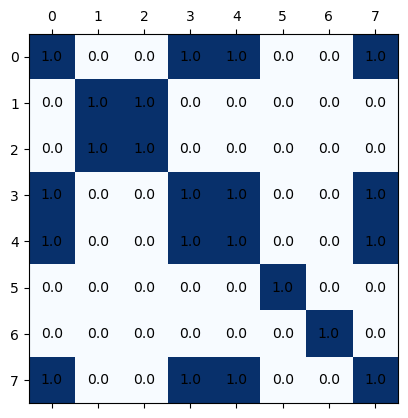

In [36]:
time_combination_matrix = np.zeros((le,le))
for i,k in enumerate(channels):
    for j,l in enumerate(channels):
        #print(k,l)
        if(i==j):
            time_combination_matrix[i,i] = 1
        else:
            time_combination_matrix[i,j] = (len(time_dict[k])==len(time_dict[l]))
fig, ax = plt.subplots()
#print(channels)
ax.matshow(time_combination_matrix, cmap=plt.cm.Blues)
for i in range(le):
    for j in range(le):
        #c = intersection_matrix[j,i]
        ax.text(i, j, str(time_combination_matrix[i,j]), va='center', ha='center')
#print(time_combination_matrix)
#ax.set_xticks(channels)
#ax.set_yticks(channels)
print(max_val,when_to_stop)

In [15]:
print(jump_value)
max_val = np.max(jump_value)
jump_value = max_val/jump_value
print(max_val,jump_value)

[0.02  0.2   0.2   0.02  0.02  0.2   0.001 0.02 ]
0.2 [ 10.   1.   1.  10.  10.   1. 200.  10.]


In [18]:
reduced_data = {channels[i]:[] for i in range(le)}
#print(data_dict)
for i in range(le):
    start,stop,step = data_dict[channels[i]].index.start,data_dict[channels[i]].index.stop,data_dict[channels[i]].index.step*jump_value[i]
    reduced_data[channels[i]] = data_dict[channels[i]][np.arange(start,int(when_to_stop*jump_value[i]),step)][:484]
    print(reduced_data[channels[i]].shape)

(484,)
(484,)
(484,)
(484,)
(484,)
(484,)
(484,)
(484,)


In [ ]:
#Finding corellation for the given data upto 646 iterative steps
reduced_data = {}
for i in range(le):
    reduced_data[channels[i]] = cleaned_data[channels[i]][:646]
    #print(reduced_data[channels[i]].shape)

[[ 1.   -0.63 -0.67  0.01 -0.28  0.85  0.12 -0.67]
 [-0.63  1.    0.97  0.48  0.7  -0.68  0.    0.21]
 [-0.67  0.97  1.    0.59  0.79 -0.79 -0.    0.21]
 [ 0.01  0.48  0.59  1.    0.78 -0.53 -0.12 -0.15]
 [-0.28  0.7   0.79  0.78  1.   -0.83 -0.37  0.14]
 [ 0.85 -0.68 -0.79 -0.53 -0.83  1.    0.   -0.24]
 [ 0.12  0.   -0.   -0.12 -0.37  0.    1.    0.31]
 [-0.67  0.21  0.21 -0.15  0.14 -0.24  0.31  1.  ]]


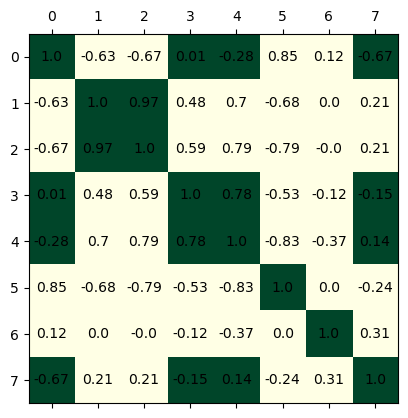

In [38]:
co_matrix = np.zeros((le,le))
for i,k in enumerate(channels):
    for j,l in enumerate(channels):
        #print(k,l)
        if(i==j):
            co_matrix[i,i] = 1
        else:
            co_matrix[i,j] = np.round(reduced_data[k].corr(reduced_data[l]),decimals=2)
print(co_matrix)
fig, ax = plt.subplots()
#print(channels)
ax.matshow(time_combination_matrix, cmap=plt.cm.YlGn)
for i in range(le):
    for j in range(le):
        #c = intersection_matrix[j,i]
        ax.text(i, j, str(co_matrix[i,j]), va='center', ha='center')

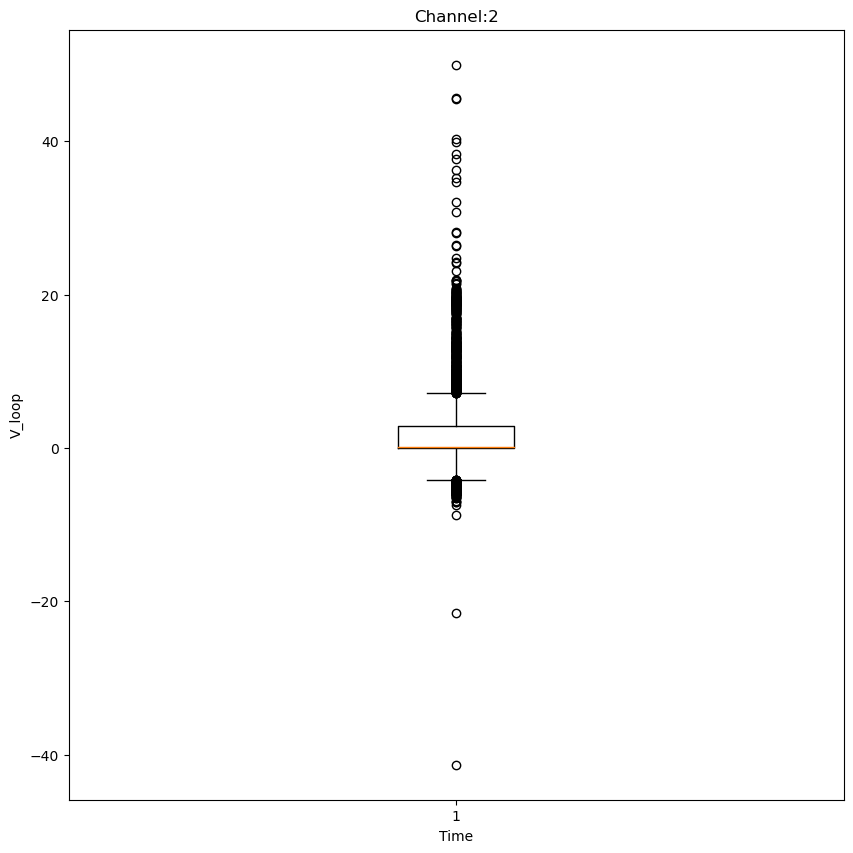

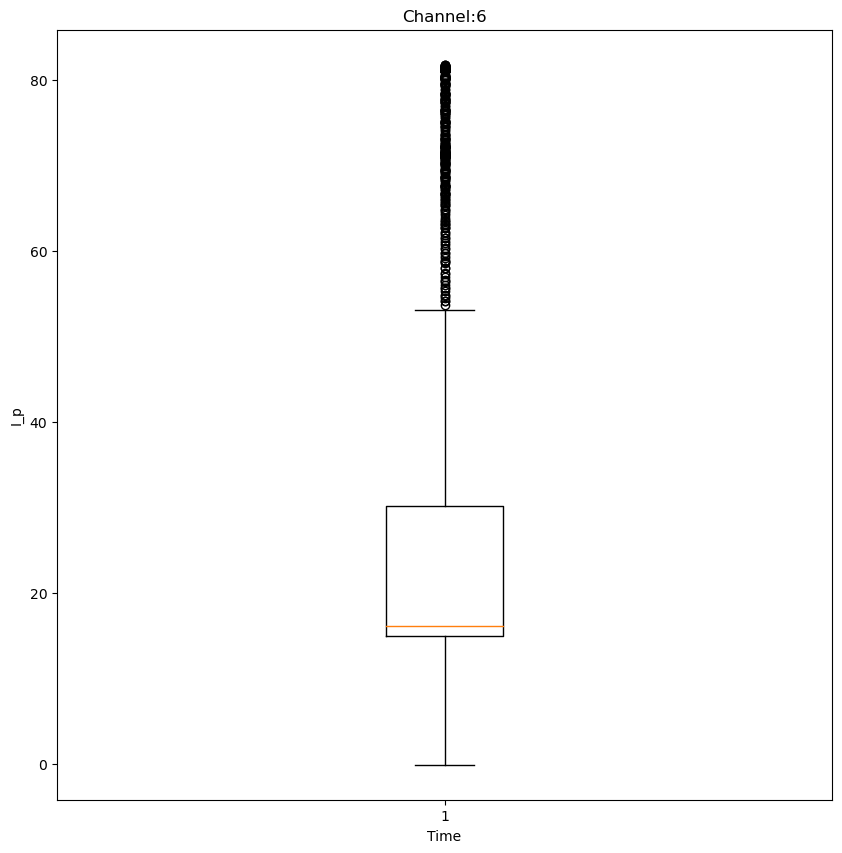

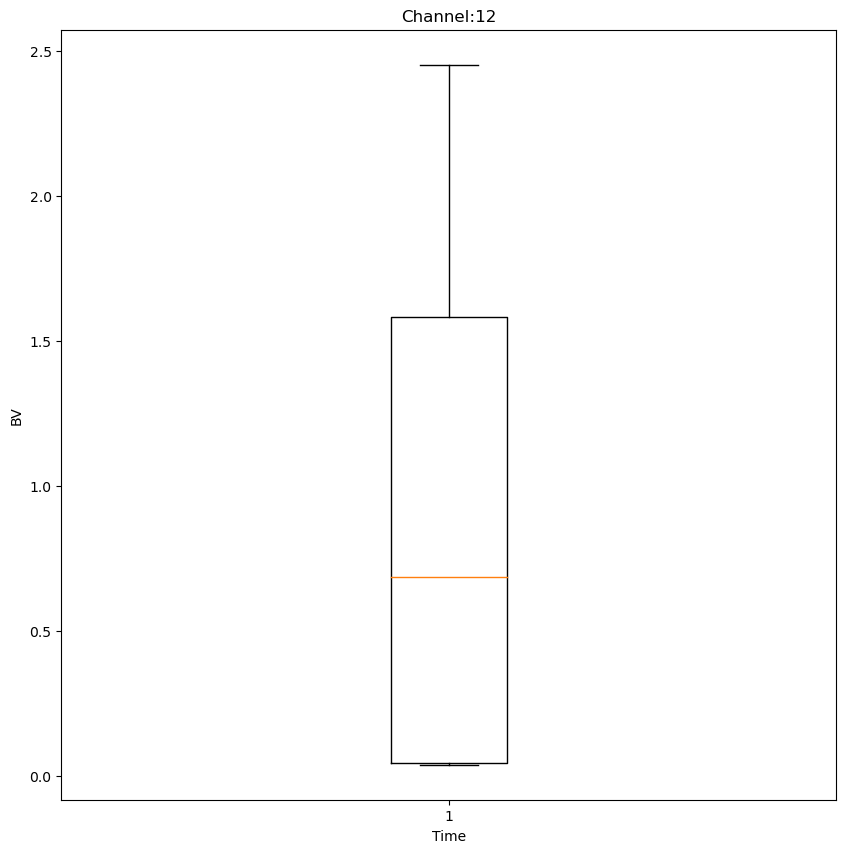

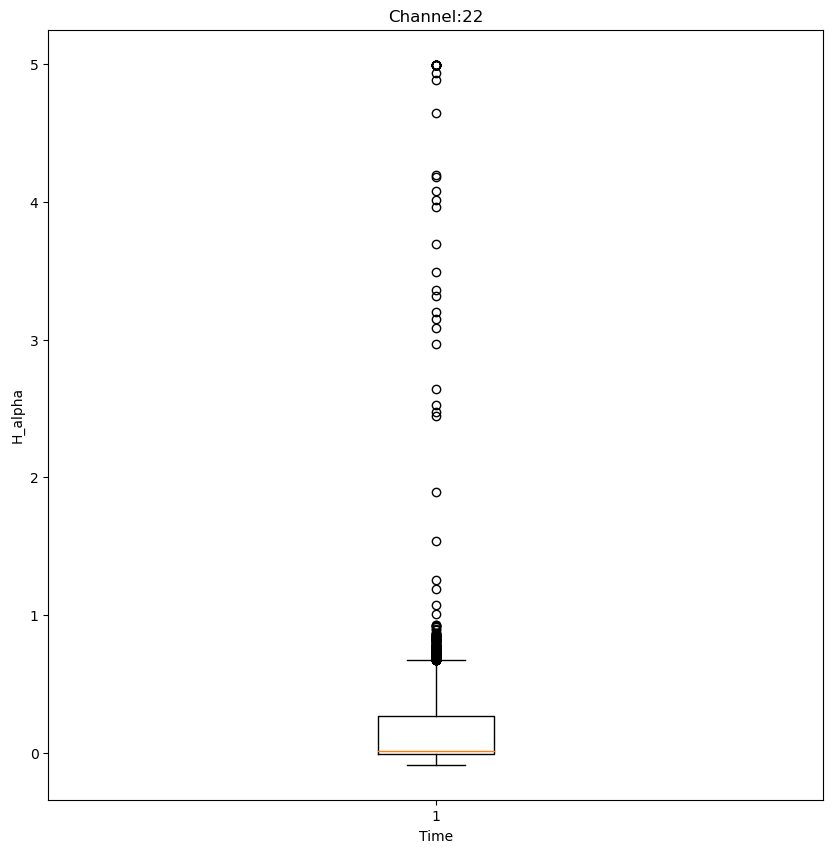

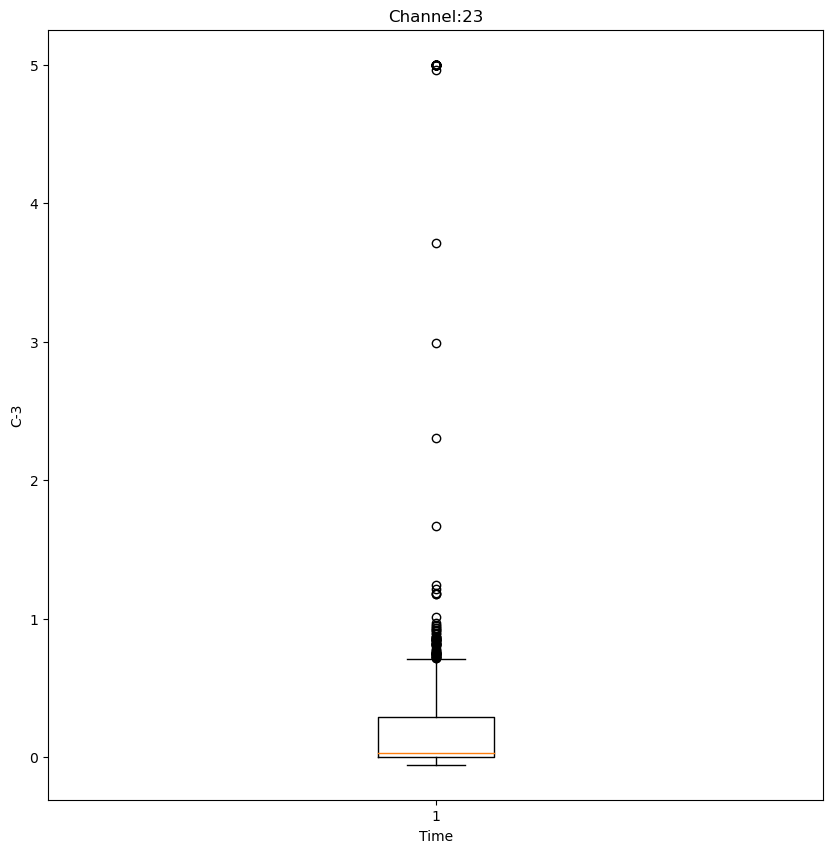

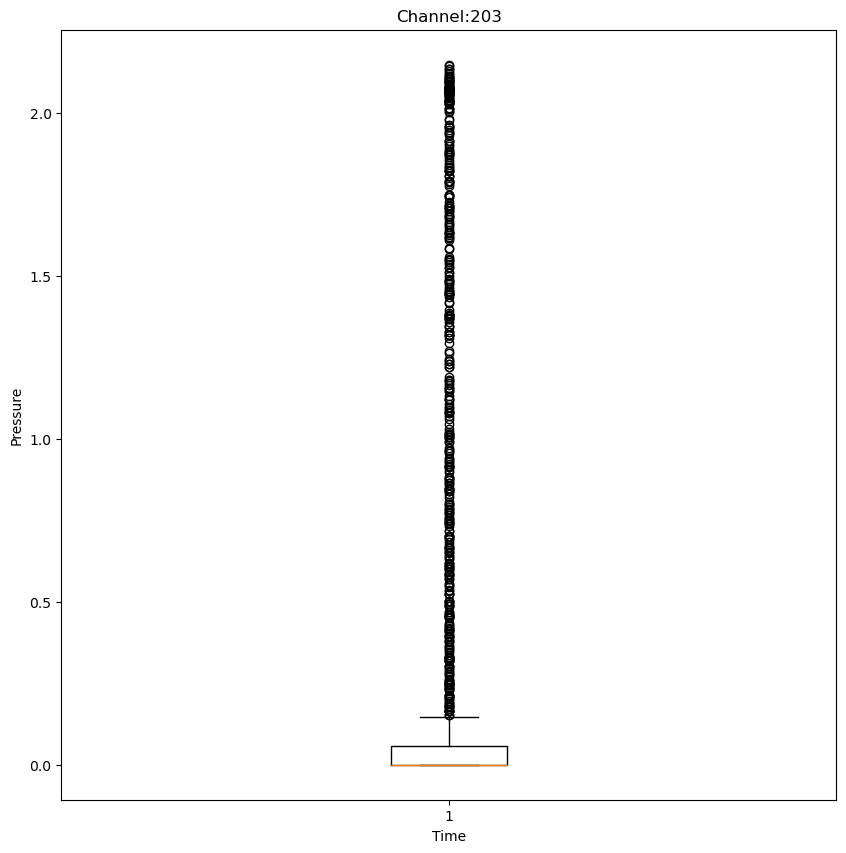

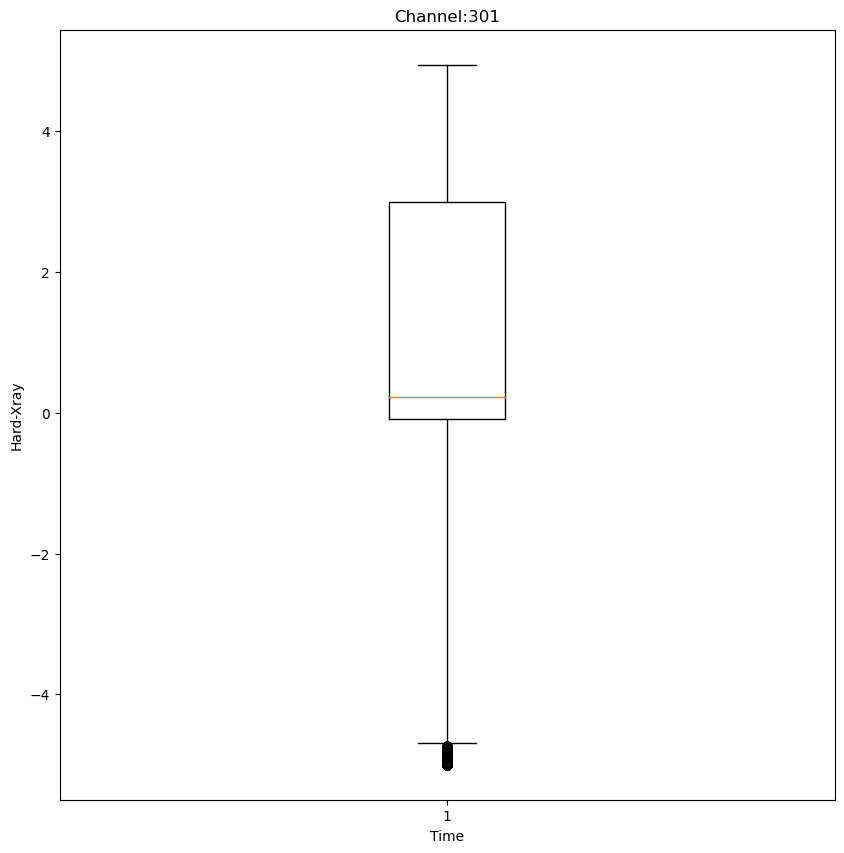

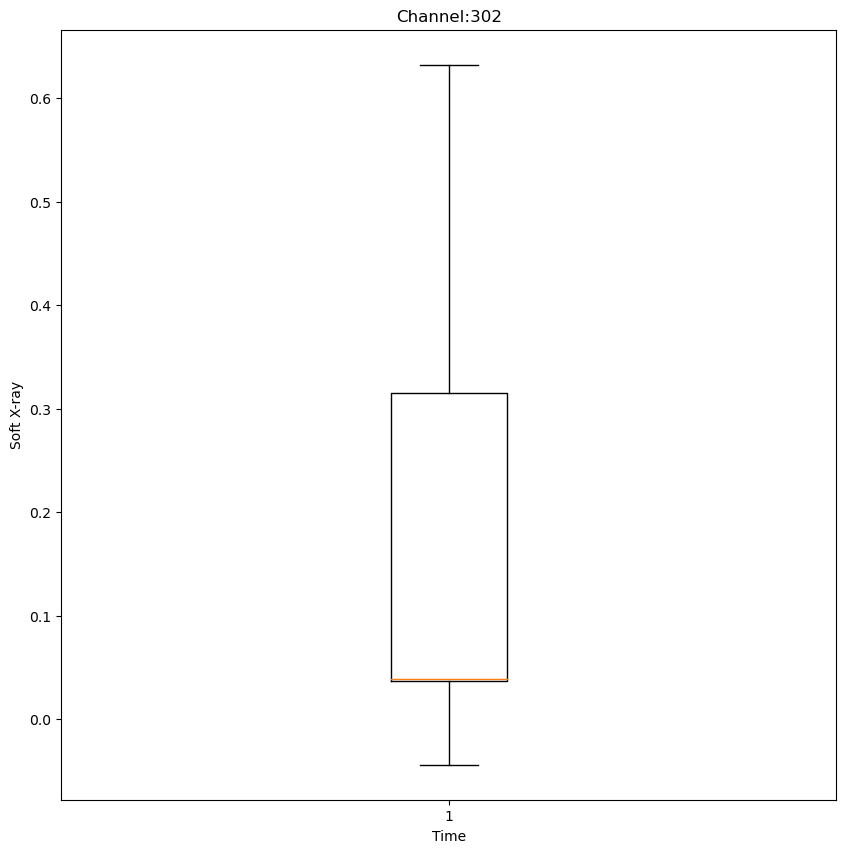

In [39]:
#Step 2 box plot for each feature
feature = ['V_loop','I_p','BV','H_alpha','C-3','Pressure','Hard-Xray','Soft X-ray']
for i in range(le):
    plt.figure(figsize=(10,10))
    plt.boxplot(data_dict[channels[i]])
    plt.xlabel('Time')
    plt.ylabel(feature[i])
    plt.title("Channel:"+str(channels[i]))